# Climate stripes demonstrated in a notebook

In [3]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for convertbng from https://files.pythonhosted.org/packages/a8/86/a717a4aed642a9332c028f68d634c800e4eaeaafebf3ec93c7fc57f97532/convertbng-0.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for kerchunk from https://files.pythonhosted.org/packages/7f/01/3716c014dd72cc97a518f8f8f0c9995fadef55191f8b49f00dae717e6bd2/kerchunk-0.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for mdpdf from https://files.pythonhosted.org/packages/ed/2a/1be7477288707b4cd3e25a53c05c87adc62fb8658cfbb3178d39fd5172d1/mdpdf-0.0.18-py3-none-any.whl.metadata
  Obtaining dependency information for pymupdf>=1.21 from https://files.pythonhosted.org/packages/f9/1a/ee7b321e0f7a75259b73f039f8768c5384fafb48359f1186c4cce3ffa356/PyMuPDF-1.24.1-cp310-none-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for commonmark>=0.

In [9]:
import requests
import os

url = "https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/HadCRUT.5.0.2.0.analysis.anomalies.ensemble_mean.nc"
fname = os.path.basename(url)
resp = requests.get(url)

with open(fname, "wb") as writer:
    writer.write(resp.content)

print(f"Wrote: {fname}")

Wrote: HadCRUT.5.0.2.0.analysis.anomalies.ensemble_mean.nc


/opt/jaspy/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


Field: long_name=blended air_temperature_anomaly over land with sea_water_temperature_anomaly (ncvar%tas_mean)
--------------------------------------------------------------------------------------------------------------
Data            : long_name=blended air_temperature_anomaly over land with sea_water_temperature_anomaly(time(2089), latitude(36), longitude(72)) K
Cell methods    : area: mean (interval: 5.0 degrees_north) time(2089): mean (interval: 1 month) realization(1): mean
Dimension coords: time(2089) = [1850-01-16 12:00:00, ..., 2024-01-16 12:00:00] standard
                : latitude(36) = [-87.5, ..., 87.5] degrees_north
                : longitude(72) = [-177.5, ..., 177.5] degrees_east
                : realization(1) = [100] 1


/opt/jaspy/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)
/opt/jaspy/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


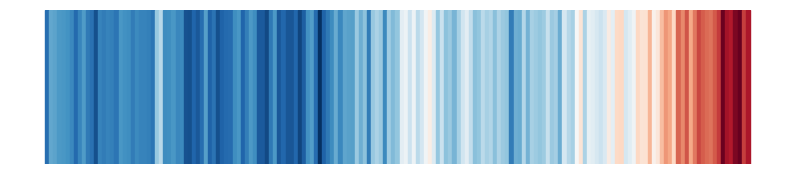

/opt/jaspy/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)
/opt/jaspy/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


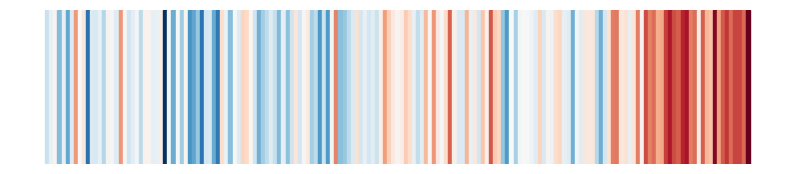

In [10]:
# %%
# 1. Import cf-python and matplotlib.pyplot:

import matplotlib.pyplot as plt

import cf

# %%
# 2. Read the field constructs:
temperature_data = cf.read(fname)[0]
print(temperature_data)

# %%
# 3. Calculate the annual mean temperature anomalies. The ``'weights=True'``
# argument is used to take the varying lengths of months into account which
# ensures that the calculated mean is more accurate:
annual_temperature = temperature_data.collapse(
    "T: mean", weights=True, group=cf.Y()
)

# %%
# 4. Select the data from 1850 to 2022:
period = annual_temperature.subspace(T=cf.year(cf.wi(1850, 2022)))

# %%
# 5. Calculate the global average temperature for each year:
global_temperature = period.collapse("X: Y: mean")

# %%
# 6. Get the global average temperature and squeeze it to remove the size 1 axis:
global_avg_temp = global_temperature.array.squeeze()

# %%
# 7. Create a normalization function that maps the interval from the minimum to
# the maximum temperature to the interval [0, 1] for colouring:
norm_global = plt.Normalize(global_avg_temp.min(), global_avg_temp.max())

# %%
# 8. Set the colormap instance:
cmap = plt.get_cmap("RdBu_r")

# %%
# 9. Create the figure and the axes for the global plot. Loop over the selected
# years, plot a colored vertical stripe for each and remove the axes:
fig_global, ax_global = plt.subplots(figsize=(10, 2))

for i in range(global_avg_temp.shape[0]):
    ax_global.axvspan(
        xmin=i - 0.5, xmax=i + 0.5, color=cmap(norm_global(global_avg_temp[i]))
    )

ax_global.axis("off")

plt.show()

# %%
# 10. For the regional warming stripes, steps 5 to 9 are repeated for the
# specific region. Here, we define the bounding box for the UK by sub-spacing over
# a domain spanning 49.9 to 59.4 degrees north and -10.5 to 1.8 degrees east:
uk_temperature = period.subspace(X=cf.wi(-10.5, 1.8), Y=cf.wi(49.9, 59.4))
uk_avg_temperature = uk_temperature.collapse("X: Y: mean")
uk_avg_temp = uk_avg_temperature.array.squeeze()
norm_uk = plt.Normalize(uk_avg_temp.min(), uk_avg_temp.max())

# %%

fig_uk, ax_uk = plt.subplots(figsize=(10, 2))

for i in range(uk_avg_temp.shape[0]):
    ax_uk.axvspan(
        xmin=i - 0.5, xmax=i + 0.5, color=cmap(norm_uk(uk_avg_temp[i]))
    )

ax_uk.axis("off")

plt.show()


/opt/jaspy/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)
/opt/jaspy/lib/python3.10/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)


(-9.15, 181.15, 0.0, 1.0)

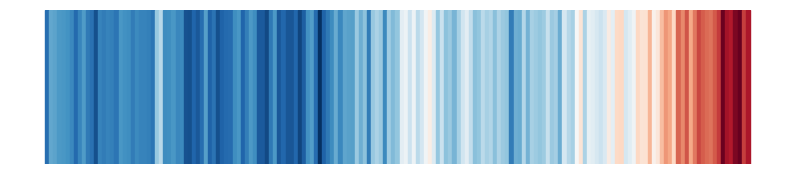

In [13]:
# With cf-python
import matplotlib.pyplot as plt
import cf

temperature_data = cf.read(fname)[0]
annual_temperature = temperature_data.collapse(
    "T: mean", weights=True, group=cf.Y()
)

period = annual_temperature.subspace(T=cf.year(cf.wi(1850, 2022)))
global_temperature = period.collapse("X: Y: mean")
global_avg_temp = global_temperature.array.squeeze()

# Normalise between 0 and 1
norm_global = plt.Normalize(global_avg_temp.min(), global_avg_temp.max())
cmap = plt.get_cmap("RdBu_r")

fig, ax = plt.subplots(figsize=(10, 2))

for i in range(global_avg_temp.shape[0]):
    ax.axvspan(
        xmin=i - 0.5, xmax=i + 0.5, color=cmap(norm_global(global_avg_temp[i]))
    )

ax.axis("off")

<xarray.Dataset>
Dimensions:           (time: 2089, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-01-1...
  * latitude          (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude         (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 ...
    time_bnds         (time, bnds) datetime64[ns] ...
    latitude_bnds     (latitude, bnds) float64 ...
    longitude_bnds    (longitude, bnds) float64 ...
    realization_bnds  (bnds) int64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2024-02-27T15:32:53+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0..

(-9.15, 181.15, 0.0, 1.0)

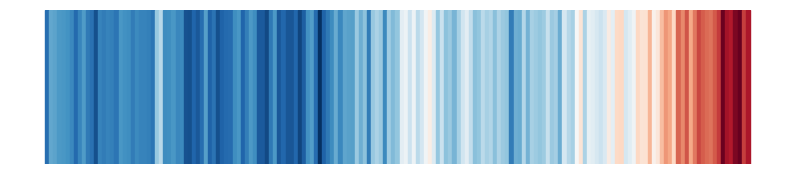

In [82]:
# With xarray
import matplotlib.pyplot as plt
import xarray as xr

ds = xr.open_dataset(fname)
print(ds)

def weighted_temporal_mean(ds, varid):
    """
    weight by days in each month
    """
    # Determine the month length
    month_length = ds.time.dt.days_in_month

    # Calculate the weights
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

    # Make sure the weights in each year add up to 1
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)

    # Subset our dataset for our variable
    obs = ds[varid]

    # Setup our masking for nan values
    cond = obs.isnull()
    ones = xr.where(cond, 0.0, 1.0)

    # Calculate the numerator
    obs_sum = (obs * wgts).resample(time="AS").sum(dim="time")

    # Calculate the denominator
    ones_out = (ones * wgts).resample(time="AS").sum(dim="time")

    # Return the weighted average
    return obs_sum / ones_out


annual_temperature = weighted_temporal_mean(ds, "tas_mean")

# annual_temperature = temperature_data.collapse(
#     "T: mean", weights=True, group=cf.Y()
# )

period = annual_temperature.sel(time=slice("1850", "2022"))
# period = annual_temperature.subspace(T=cf.year(cf.wi(1850, 2022)))

global_temperature = period.mean(("longitude", "latitude"))
# global_temperature = period.collapse("X: Y: mean")

global_avg_temp = global_temperature.squeeze()
# global_avg_temp = global_temperature.array.squeeze()

# # Normalise between 0 and 1
norm_global = plt.Normalize(global_avg_temp.min(), global_avg_temp.max())
cmap = plt.get_cmap("RdBu_r")

fig, ax = plt.subplots(figsize=(10, 2))

data = []
for i in range(global_avg_temp.shape[0]):
    value = float(global_avg_temp[i])
    normalised_value = norm_global(value)
    colour = cmap(normalised_value)

    data.append([value, normalised_value, colour])
    ax.axvspan(
        xmin=i - 0.5, xmax=i + 0.5, color=colour
    )

ax.axis("off")

In [92]:
data[0]

[-0.4412724445648426,
 0.12046513707417844,
 (0.1529411764705883, 0.4311418685121108, 0.6904267589388697, 1.0)]

In [95]:
low, high = data[0], data[-1]

def roundlist(l):
    a, b = [round(i, 2) for i in l[:2]]
    col = [round(i, 2) for i in l[2]]
    return [a, b, col]

low = roundlist(low)
high = roundlist(high)
low, high

([-0.44, 0.12, [0.15, 0.43, 0.69, 1.0]], [0.99, 0.91, [0.67, 0.08, 0.16, 1.0]])

## Explore the colour map

What can we learn about the colours, and the underlying values?

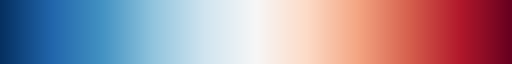

In [96]:
cmap

In [103]:
# RGBA values include "A" which is alpha for opacity - are they all 1?
assert min([i[2][3] for i in data]) == 1 and max([i[2][3] for i in data]) == 1

In [104]:
# Get the actual data (not the anomalies)

In [105]:
!curl -XGET https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.nc

/usr/bin/sh: line 1: wget: command not found


In [102]:
# Let's make a table of actual values
# Presumably -0.44 at the start and 0.99 at the end is the difference 
# between those dates and the period used for comparison
import pandas as pd

for i in range(0, len(data), 10):
    x = roundlist(data[i])
    rel_value, actual_value, rgba_value = x[0], float(global_avg_temp[i]), x[2] 
    print(f"Rel value: {rel_value}, Actuals: {actual_value}, RGBA: {rgba_value}")

Rel value: -0.44, Actuals: -0.4412724445648426, RGBA: [0.15, 0.43, 0.69, 1.0]
Rel value: -0.39, Actuals: -0.3932531230460232, RGBA: [0.19, 0.48, 0.72, 1.0]
Rel value: -0.32, Actuals: -0.31947715300880836, RGBA: [0.25, 0.56, 0.75, 1.0]
Rel value: -0.32, Actuals: -0.3154487713005761, RGBA: [0.25, 0.56, 0.75, 1.0]
Rel value: -0.49, Actuals: -0.48936727597582513, RGBA: [0.12, 0.39, 0.66, 1.0]
Rel value: -0.27, Actuals: -0.2710364631921242, RGBA: [0.3, 0.6, 0.78, 1.0]
Rel value: -0.53, Actuals: -0.5308136503138359, RGBA: [0.1, 0.34, 0.59, 1.0]
Rel value: -0.32, Actuals: -0.3210175388160285, RGBA: [0.24, 0.55, 0.75, 1.0]
Rel value: -0.1, Actuals: -0.097163444875832, RGBA: [0.6, 0.78, 0.88, 1.0]
Rel value: 0.19, Actuals: 0.1928746180684636, RGBA: [0.92, 0.95, 0.96, 1.0]
Rel value: -0.17, Actuals: -0.17401569722469204, RGBA: [0.47, 0.71, 0.84, 1.0]
Rel value: -0.13, Actuals: -0.13193457570129305, RGBA: [0.54, 0.75, 0.86, 1.0]
Rel value: -0.08, Actuals: -0.08013388475992336, RGBA: [0.62, 0.79, 